____

<font size=+3 color=#FFAA00> Classification: Sentiment Analysis </font>

____

This ICA is part of a three-part series on applications of classification. We will examine:
* images,
* time series,
* sentiment analysis.

In addition to learning about, and comparing, three disparate applications of classification, we will continue to focus on the machine learning workflow and think about your project. 

There are two other goals we want to achieve with these three ICAs:
* we will have a contest among workflows,
* we will document our workflows each day, and improve in the next round.

We will use the [Delphi Method](https://www.rand.org/topics/delphi-method.html) to see if we can create the ultimate ML workflow! The way this will work is that you complete this ICA and put your ML workflow design in <font color=#FF2211> [THIS DOCUMENT](https://docs.google.com/document/d/19PrrWMYzKuKvObKHH1cjsY8gqkfNEhOk5hMtDid_bTk/edit?usp=sharing) </font>. It is advisable to work on the document as you work through this ICA.

_Important_: Some of you may know ML estimators from other libraries, such as TensorFlow -- do not use them here. Only use `sklearn` so that we can share results among **all** of your classmates. 

<font size=+1 color=#00FFAA> Interlude on Projects </font> 

The topic of your project will be chosen by you. Now is the time to be thinking about what your project might be. You might already have an idea, from your thesis work, or perhaps an application we cover here triggers an idea for you. As we work through these three examples, compare what we are doing here to what you envision your project to be. 

You will complete a _multlabel_ application in the HW this week. 

_____

_____

<font size=+2 color=#00AAFF> First Step: Delphi Method </font>

The main two goals for today are:
* refine your classification workflow,
* learn how classification can be used with text/words.


<font size=+1 color=#00FFAA> Refine Your Workflow </font>

Access our [Delphi document](https://docs.google.com/document/d/19PrrWMYzKuKvObKHH1cjsY8gqkfNEhOk5hMtDid_bTk/edit?usp=sharing) and read the comments from the previous ICA. Discuss the workflow you used last time and, based on what you see from the document, design an improved workflow. 

Once you have completed your discussion and have your new design, describe the steps in a markdown cell.  It is important that all steps from IDA through metrics/analysis are included. Mark steps that might be optional.

At the end of this ICA, go back into the Delphi document and give your group's absolute best workflow. 

![SA](https://d3caycb064h6u1.cloudfront.net/wp-content/uploads/2021/06/sentimentanalysishotelgeneric-2048x803-1.jpg)
_____

<font size=+2 color=#00AAFF> Second Step: Tokenization </font>


In this ICA we explore a third application of classification, which is probably one you encounter in your everyday life nearly everyday: ranking of reviews. Using human-generated feedback is used for everything from ranking people to products. Here, we will focus on movies. 

The interesting twist of this application relative to the two previous ICAs in this series is that we will use human language, rather than an image or a time series. This area of machine learning, generally referred to as "_Natural Language Processing_" (NLP) is extremely challenging and now in the news nearly everyday. NLP is the technology behind the chatbots that have nearly overnight become part of lives. You can thank NLP for ChatGPT. 

NLP is a vast topic and there are entire courses on it; we'll only do a little in this ICA. Before going further, stop reading and discuss with your group how you would go about creating a classifier that inputs text, written by a human, and puts the text into a class (let's assume binary). On Monday, we learned an interesting trick for handling time series: convert the time series to a small number of discrete features we can put into $X$ and then use previous tools. 

Can you do that with words? 

What do your group members think? Put some ideas into a markdown cell. 

_____

![token](https://miro.medium.com/v2/resize:fit:1400/1*CdjbU3J5BYuIi-4WbWnKng.png)

It turns out that there are many ways of converting text into numerical values digestable by numerical algorithms. Let's explore this idea. 

The goal is to convert text into tokens. Roughly speaking, a token is a number associated with a word. For example, we could simply number of all of the words in a dictionary from $1$ to $N$, translate the text into these numbers, and process strings as a list of numerical features. For many reasons, this is not the smartest thing to do. One reason is that we also need to tokenize other characters, such as spaces, symbols, punctuation and so on. And, sometimes there is more than one piece of information in a single word, such as _nonsensical_ or _postmillennialism_.  

If you follow the developing stories of AI developments (e.g., ChatGPT) closely, you often hear the words "token" used as a measure of the power of the AI. 

One practical application of NLP is sentiment analysis, which is the analysis of text to understand how the person who wrote it feels. This could be used in rating of Amazon products, web page helpr chatbots or, in our case, movies. If we know how people feel about movies, we can not only rank them, but also make good suggestions for movies they would like. 


_____

<font size=+2 color=#00AAFF> Third Step: Obtain and Explore Data </font>


You won't be surprised to know that there is a lot of data on this! We will use a dataset that lives in TensorFlow (TF). If you don't have TF installed, this is a good time to do it as we'll be using it later in the semester. Even if you have it, you may need to update it. 

Let's read in the data and look at it. [Read this page.](https://www.tensorflow.org/tutorials/keras/text_classification_with_hub)


In [33]:
import numpy as np
from tensorflow.keras.datasets import imdb

# Load the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

train_labels.shape

(25000,)

In [34]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

Pause and explore the data with your group. Describe it in a markdown cell. What are you seeing? Are there any issues you can already spot? 

____

How was this dataset made? A simple algorithm was used: rank the frequency of each word and assign each word with its (numerical) frequency.  Perform some EDA to see if you can see this pattern. (The mapping isn't perfect because some of the smaller numbers are used for spaces, etc.) 

This figure might provide some intuition.

![word_freq](https://i.imgur.com/8vAvIOz.jpg)

This library provides a way to reverse the data, just so that you can see it. Understand this code, modify it, and discuss what you find with your group in a markdown cell. 

In [52]:
# get the word index from the dataset
word_index = imdb.get_word_index()

# reverse the word index to map integer indices to words
reverse_word_index = dict([(value + 3, key) for (key, value) in word_index.items()])

# decode a review (subtract 3 from each index to align with the word indices)
decoded_review = ' '.join([reverse_word_index.get(i, '?') for i in train_data[0]])

print(decoded_review)


? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [56]:
# Sort the dictionary by values
sorted_word_index = sorted(word_index.items(), key=lambda x: x[0])

# Iterate through the sorted dictionary and print the keys and values
for key, value in sorted_word_index.items():
    if value <= 10:
        print(f"{key}: \t{value}")

AttributeError: 'list' object has no attribute 'items'

In [58]:
sorted_word_index = sorted(word_index.items(), key=lambda x: x[1])
sorted_word_index

[('the', 1),
 ('and', 2),
 ('a', 3),
 ('of', 4),
 ('to', 5),
 ('is', 6),
 ('br', 7),
 ('in', 8),
 ('it', 9),
 ('i', 10),
 ('this', 11),
 ('that', 12),
 ('was', 13),
 ('as', 14),
 ('for', 15),
 ('with', 16),
 ('movie', 17),
 ('but', 18),
 ('film', 19),
 ('on', 20),
 ('not', 21),
 ('you', 22),
 ('are', 23),
 ('his', 24),
 ('have', 25),
 ('he', 26),
 ('be', 27),
 ('one', 28),
 ('all', 29),
 ('at', 30),
 ('by', 31),
 ('an', 32),
 ('they', 33),
 ('who', 34),
 ('so', 35),
 ('from', 36),
 ('like', 37),
 ('her', 38),
 ('or', 39),
 ('just', 40),
 ('about', 41),
 ("it's", 42),
 ('out', 43),
 ('has', 44),
 ('if', 45),
 ('some', 46),
 ('there', 47),
 ('what', 48),
 ('good', 49),
 ('more', 50),
 ('when', 51),
 ('very', 52),
 ('up', 53),
 ('no', 54),
 ('time', 55),
 ('she', 56),
 ('even', 57),
 ('my', 58),
 ('would', 59),
 ('which', 60),
 ('only', 61),
 ('story', 62),
 ('really', 63),
 ('see', 64),
 ('their', 65),
 ('had', 66),
 ('can', 67),
 ('were', 68),
 ('me', 69),
 ('well', 70),
 ('than', 71),


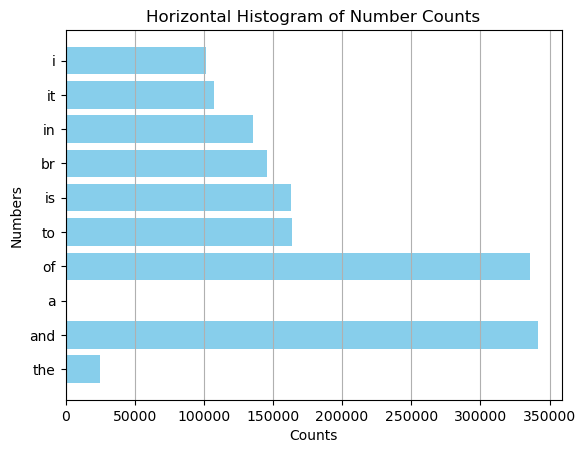

In [25]:
import matplotlib.pyplot as plt
# Initialize a dictionary to store counts of numbers 1 to 10
number_counts = {i: 0 for i in range(1, 11)}


# Iterate over each list in the array
for sublist in train_data[0]:
    # Iterate over each number in the sublist
    for num in sublist:
        # Check if the number is within the range 1 to 10
        if num in range(1, 11):
            # Increment the count for this number
            number_counts[num] += 1

# Extract the numbers and their corresponding counts
numbers = list(number_counts.keys())
counts = list(number_counts.values())

# Plot the horizontal histogram
plt.barh(numbers, counts, color='skyblue')
plt.xlabel('Counts')
plt.ylabel('Numbers')
plt.title('Horizontal Histogram of Number Counts')
plt.grid(axis='x')  # Add gridlines only along the x-axis
plt.yticks(numbers,labels = [reverse_word_index[i+3] for i in numbers])
plt.show()

In [48]:
# Initialize a dictionary to store counts of numbers 1 to 10
number_counts = {i: 0 for i in range(1, 11)}


# Iterate over each list in the array
for sublist in train_data[:1]:
    # Iterate over each number in the sublist
    for num in sublist:
        # Check if the number is within the range 1 to 10
        if num in range(1, 11):
            # Increment the count for this number
            number_counts[num] += 1

# Extract the numbers and their corresponding counts
numbers = list(number_counts.keys())
counts = list(number_counts.values())

numbers,counts
train_data[:1]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32])],
      dtype=object)

_____

<font size=+2 color=#00AAFF> Fourth Step: Preprocessing </font>


Next, we need to preprocess the data. Can you think of anything we have learned in this class that you might want to do or look for? 

For NLP, there is one new preprocessing step we need. If we want to use our standard estimators, we need to ensure the data is in a form they can digest; we already converted to numbers through the tokenization. But, when people write their sentiments, they don't pay attention to how many tokens each response is: they are all of differing lengths. 

As there are many ways to deal with this and we don't have hours of coding and debugging, simply understand this code and give very detailed comments.


In [3]:
def vectorize_sequences(sequences, dimension=10000):
    # create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# vectorize the training and test data
X_train = vectorize_sequences(train_data)
X_test = vectorize_sequences(test_data)

# labels are already binary, so no need to vectorize them
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')


_____

<font size=+2 color=#00AAFF> Fifth Step: Logistic Regression </font>

In the next chapter we will describe mathematically logistic regression, which we have used as a black box so far. With your group, explore logistic regression using the documentation. Be sure you know how to use and what it can do for you. 

I'll give you the base code to save some time. Importantly, what are the possible hyperparameters (using the online docs)? 


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


_____

<font size=+2 color=#00AAFF> Sixth Step: Metrics and Scoring </font>

Perhaps the most important step in the ML workflow is getting results and knowing what they mean. Comment this code. 

In a markdown cell, give precise mathematical definitions for what these "five" metrics (accuracy, precision, recall, F1, confusion) do, including a discussion of what information they provide and how that information would be used in the real world. How do the methods work together to give you a nuanced view of the ML? 

In [5]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8620
Precision: 0.8642
Recall: 0.8590
F1-Score: 0.8616
Confusion Matrix:
[[10812  1688]
 [ 1762 10738]]


_____

<font size=+2 color=#00AAFF> Seventh Step: Delphi Method </font>

Update our [Delphi document](https://docs.google.com/document/d/19PrrWMYzKuKvObKHH1cjsY8gqkfNEhOk5hMtDid_bTk/edit?usp=sharing) to now incorporate all new insights, and especially issues that NLP brings to the table. 
